In [1]:
# Author : Amir Shokri
# github link : https://github.com/amirshnll/Vicon-Physical-Action
# dataset link : http://archive.ics.uci.edu/ml/datasets/Vicon+Physical+Action+Data+Set
# email : amirsh.nll@gmail.com

# Read data

In [49]:
import pandas as pd
import numpy as np
import os

path_data='data'
lbl_binary=list()
lbl_20_class=list()
data=[]
for folder in os.listdir(path_data):
    path_in=os.path.join(path_data,folder)
    for sub_folder in os.listdir(path_in):
        
        print('---------{0}------------'.format(sub_folder))
        path_in2=os.path.join(path_in,sub_folder)
        for file_name in os.listdir(path_in2):
            lbl_one=file_name[:-4]
            print(file_name[:-4])
            path_file=os.path.join(path_in2,file_name)
            txt_data=np.array(pd.read_csv(path_file, delim_whitespace=True))
            txt_data=txt_data[:,1:]
            data.extend(txt_data)
            lbl_all=((lbl_one+',')*txt_data.shape[0]).split(',')[:-1]
            lbl_20_class.extend(lbl_all)
            print(txt_data.shape)

---------aggressive------------
Elbowing
(2396, 27)
Frontkicking
(2091, 27)
Hamering
(1901, 27)
Headering
(1510, 27)
Kneeing
(2460, 27)
Pulling
(1872, 27)
Punching
(2485, 27)
Pushing
(2095, 27)
Sidekicking
(1444, 27)
Slapping
(2136, 27)
---------normal------------
Bowing
(2013, 27)
Clapping
(1715, 27)
Handshaking
(2558, 27)
Hugging
(1972, 27)
Jumping
(1906, 27)
Running
(2241, 27)
Seating
(2273, 27)
Standing
(2101, 27)
Walking
(1720, 27)
Waving
(971, 27)
---------aggressive------------
Elbowing
(2093, 27)
Frontkicking
(2133, 27)
Hamering
(1933, 27)
Headering
(1956, 27)
Kneeing
(2471, 27)
Pulling
(1788, 27)
Punching
(1858, 27)
Pushing
(1639, 27)
Sidekicking
(2425, 27)
Slapping
(2462, 27)
---------normal------------
Bowing
(1943, 27)
Clapping
(1822, 27)
Handshaking
(1591, 27)
Hugging
(2019, 27)
Jumping
(2030, 27)
Running  [worse]
(2093, 27)
Running
(2338, 27)
Seating
(2096, 27)
Standing
(2463, 27)
Walking
(1555, 27)
---------aggressive------------
Elbowing
(2012, 27)
Frontkicking
(1675, 2

In [52]:
print(len(lbl_20_class))
print(len(data))

605181
605181


# Preproccessing

In [55]:
print('-----------Preproccessing----------------')

from sklearn.preprocessing import LabelEncoder
import numpy as np
encoder = LabelEncoder()
lbl_20_class=np.array(lbl_20_class)
lbl_20_class=encoder.fit_transform(lbl_20_class.reshape(-1, 1))



print(lbl_20_class)

-----------Preproccessing----------------


C:\Users\Human\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[ 2  2  2 ... 20 20 20]


# normalize

In [56]:
from sklearn import preprocessing
Data_lable=lbl_20_class
Data_main=data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Data_main)
Data_main=scaler.transform(Data_main)
print(Data_main)

[[0.68426919 0.55894291 0.70059154 ... 0.6955238  0.51383589 0.10203499]
 [0.68426919 0.55894291 0.70059154 ... 0.6955238  0.51383589 0.10203499]
 [0.68426919 0.55894291 0.70059154 ... 0.6955238  0.51383589 0.10203499]
 ...
 [0.4956291  0.48598417 0.73733102 ... 0.52708659 0.57787027 0.09402593]
 [0.4956291  0.48598417 0.73733102 ... 0.52708659 0.57787027 0.09402593]
 [0.4956291  0.48598417 0.73733102 ... 0.52708659 0.57787027 0.09402593]]


# 'DT','KNN','NB','MLP','LR'

In [ ]:
import numpy as np
import os
from pytictoc import TicToc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


def run_all_algorithm(Train_data,Test_data,Train_lable,Test_lable,str_out):
    
        
    print(np.shape(Test_data))
    print(np.shape(Train_data))
    print(np.shape(Train_lable))
    print(np.shape(Test_lable))
    
    algorithms_name=['DT','KNN','NB','MLP','LR']
    alg_num=len(algorithms_name)
    accuracy_array=np.zeros(alg_num)
    precision_array=np.zeros(alg_num)
    recall_array=np.zeros(alg_num)
    f1_score_array=np.zeros(alg_num)
    time_array=np.zeros(alg_num)

    t = TicToc()
          

    print('---------------------DT---------------------')
    K=0;
    t.tic() #Start timer
    classifier_DT = DecisionTreeClassifier(max_depth=1000,random_state=0)
    classifier_DT.fit(Train_data, Train_lable)
    Test_predict = classifier_DT.predict(Test_data)
    Con_matrix=confusion_matrix(Test_lable, Test_predict)
    TimeDT=t.tocvalue() #Time elapsed since t.tic()
    classfi_report=classification_report(Test_lable, Test_predict,output_dict=True)
    
    # save to array
    accuracy_array[K]=accuracy_score(Test_lable, Test_predict)
    precision_array[K]= classfi_report['macro avg']['precision'] 
    recall_array[K]= classfi_report['macro avg']['recall']    
    f1_score_array[K]= classfi_report['macro avg']['f1-score']
    time_array[K]=TimeDT
    print(accuracy_array[K])
    
    
    print('--------------NB----------------')
    K+=1;
    t.tic() #Start timer
    classifier = MultinomialNB()
    classifier.fit(Train_data, Train_lable)
    Test_predict = classifier.predict(Test_data)
    TimeNB=t.tocvalue() #Time elapsed since t.tic()
    Con_matrix=confusion_matrix(Test_lable, Test_predict)
    classfi_report=classification_report(Test_lable, Test_predict,output_dict=True)
    
    
    # save to array
    accuracy_array[K]=accuracy_score(Test_lable, Test_predict)
    precision_array[K]= classfi_report['macro avg']['precision'] 
    recall_array[K]= classfi_report['macro avg']['recall']    
    f1_score_array[K]= classfi_report['macro avg']['f1-score']
    time_array[K]=TimeNB
    print(accuracy_array[K])
    print('---------------------KNN---------------------')
    K+=1;
    t.tic() #Start timer
    classifier=KNeighborsClassifier(n_neighbors=10)
    classifier.fit(Train_data, Train_lable)
    Test_predict = classifier.predict(Test_data)
    TimeKNN=t.tocvalue() #Time elapsed since t.tic()
    Con_matrix=confusion_matrix(Test_lable, Test_predict)
    classfi_report=classification_report(Test_lable, Test_predict,output_dict=True)
    
    # save to array
    accuracy_array[K]=accuracy_score(Test_lable, Test_predict)
    precision_array[K]= classfi_report['macro avg']['precision'] 
    recall_array[K]= classfi_report['macro avg']['recall']    
    f1_score_array[K]= classfi_report['macro avg']['f1-score']
    time_array[K]=TimeKNN
    print(accuracy_array[K])
    
    print('---------------------MLP---------------------')
    K+=1;
    t.tic() #Start timer
    classifier=MLPClassifier( solver='adam', random_state=0,hidden_layer_sizes=[5], max_iter=200)
    classifier.fit(Train_data, Train_lable)
    Test_predict = classifier.predict(Test_data)
    TimeMLP=t.tocvalue() #Time elapsed since t.tic()
    Con_matrix=confusion_matrix(Test_lable, Test_predict)
    classfi_report=classification_report(Test_lable, Test_predict,output_dict=True)
    
    # save to array
    accuracy_array[K]=accuracy_score(Test_lable, Test_predict)
    precision_array[K]= classfi_report['macro avg']['precision'] 
    recall_array[K]= classfi_report['macro avg']['recall']    
    f1_score_array[K]= classfi_report['macro avg']['f1-score']
    time_array[K]=TimeMLP
    print(accuracy_array[K])
    
    print('---------------------LogisticRegression---------------------')
    K+=1;
    t.tic() #Start timer
    classifier=LogisticRegression()
    classifier.fit(Train_data, Train_lable)
    Test_predict = classifier.predict(Test_data)
    TimeLR=t.tocvalue() #Time elapsed since t.tic()
    Con_matrix=confusion_matrix(Test_lable, Test_predict)
    classfi_report=classification_report(Test_lable, Test_predict,output_dict=True)
    
    # save to array
    accuracy_array[K]=accuracy_score(Test_lable, Test_predict)
    precision_array[K]= classfi_report['macro avg']['precision'] 
    recall_array[K]= classfi_report['macro avg']['recall']    
    f1_score_array[K]= classfi_report['macro avg']['f1-score']
    time_array[K]=TimeLR
    print(accuracy_array[K])
    
    
    
    
    

    H=6
    L=8
    
    
    
    print('--------------------result--------------------------')
    fig1=plt.figure(figsize=(H, L)) #  
    plt.bar(algorithms_name, accuracy_array,color = ['red', 'green'])
    plt.xticks(algorithms_name, rotation=70)
    plt.ylabel('percent%')
    plt.title('Accuracy of all Algorithm')
    plt.xlabel("Algoritm names")
    for i, v in enumerate(accuracy_array):
        v=round(v,2)
        plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
    fig1.show()
    plt.savefig(os.path.join(str_out+' accuracy.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    
     
    fig2=plt.figure(figsize=(H, L)) #  
    plt.bar(algorithms_name, precision_array,color = ['red', 'green'])
    plt.xticks(algorithms_name, rotation=70)
    plt.ylabel('percent%')
    plt.title('Precision of all Algorithm')
    plt.xlabel("Algoritm names")
    for i, v in enumerate(precision_array):
        v=round(v,2)
        plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
    fig2.show()
    plt.savefig(os.path.join(str_out+' precision.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    
    
    
    
    fig3=plt.figure(figsize=(H, L)) #  
    plt.bar(algorithms_name, recall_array,color = ['red', 'green'])
    plt.xticks(algorithms_name, rotation=70)
    plt.ylabel('percent%')
    plt.title('Recallof all Algorithm')
    plt.xlabel("Algoritm names")
    for i, v in enumerate(recall_array):
        v=round(v,2)
        plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
    fig3.show()
    plt.savefig(os.path.join(str_out+' recall.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    
    
    
    fig4=plt.figure(figsize=(H, L)) #  
    plt.bar(algorithms_name, f1_score_array,color = ['red', 'green'])
    plt.xticks(algorithms_name, rotation=70)
    plt.ylabel('percent%')
    plt.title('f1-score of all Algorithm')
    plt.xlabel("Algoritm names")
    for i, v in enumerate(f1_score_array):
        v=round(v,2)
        plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
    fig4.show()
    plt.savefig(os.path.join(str_out+' f1_score.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    
    
    
    fig5=plt.figure(figsize=(H, L)) # 
    plt.bar(algorithms_name, time_array,color = ['blue', 'green'])
    plt.xticks(algorithms_name, rotation=70)
    plt.ylabel('time(s)')
    plt.title('time of all Algorithm')
    plt.xlabel("Algoritm names")
    for i, v in enumerate(time_array):
        v=round(v,2)
        plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
    plt.savefig(os.path.join(str_out+' time.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    fig5.show()
    
    
    np.savetxt(str_out+'accuracy.csv', accuracy_array, delimiter=',')
    np.savetxt(str_out+' precision_array.csv', precision_array, delimiter=',')
    np.savetxt(str_out+'recall_array.csv', recall_array, delimiter=',')
    np.savetxt(str_out+' time_array.csv', time_array, delimiter=',')
    np.savetxt(str_out+' f1-score.csv', f1_score_array, delimiter=',')


# train_test_split

(121037, 27)
(484144, 27)
(484144,)
(121037,)
---------------------DT---------------------
0.9986119946793129
--------------NB----------------


C:\Users\Human\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.07363037748787561
---------------------KNN---------------------
0.998562423060717
---------------------MLP---------------------


C:\Users\Human\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Human\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.48655369845584406
---------------------LogisticRegression---------------------


C:\Users\Human\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5379594669398614
--------------------result--------------------------


<ipython-input-60-a1fc3c3f9089>:144: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-60-a1fc3c3f9089>:157: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()
<ipython-input-60-a1fc3c3f9089>:172: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()
<ipython-input-60-a1fc3c3f9089>:186: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()
<ipython-input-60-a1fc3c3f9089>:201: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig5.show()


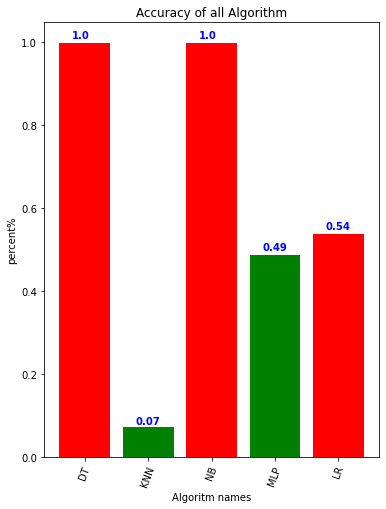

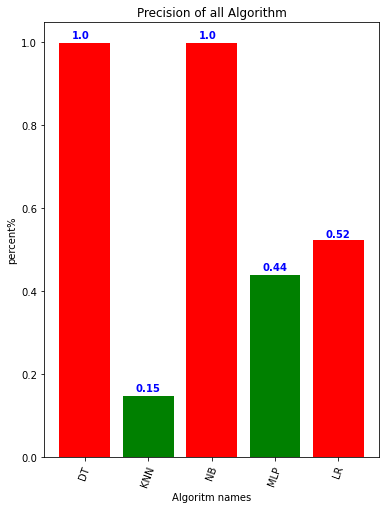

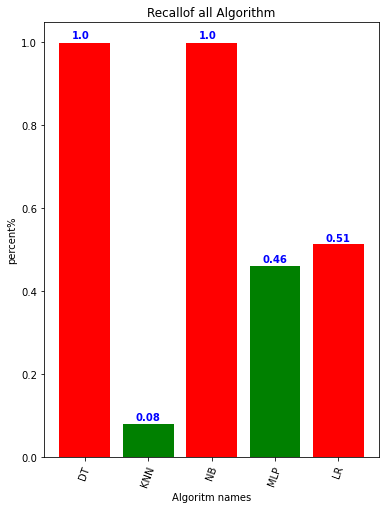

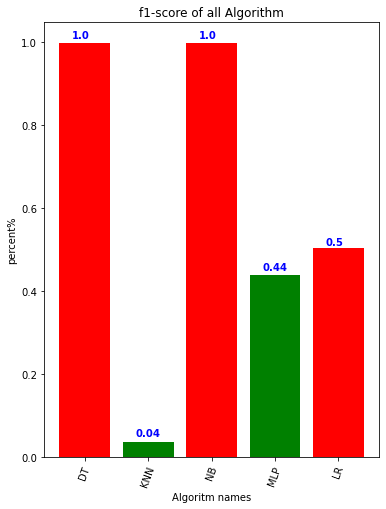

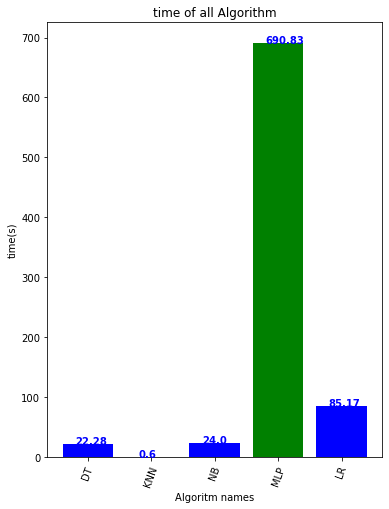

In [62]:
from sklearn.model_selection import train_test_split
Train_data, Test_data, Train_lable, Test_lable = train_test_split(Data_main, Data_lable, test_size=0.20)
run_all_algorithm(Train_data, Test_data, Train_lable, Test_lable ,"")